In [1]:
import libraries as lib
import numpy as np
import matplotlib.pyplot


In [3]:
directory_2023 = "../../../OneDrive - HvA/Logfiles/SOLAR/2023/20230705-20230717_monaco_frankrijk_belgie_nederland/0106 - 20230716T095837 11h54m40s 90.973km Uikhoven - Boxmeer"
directory_2024 = "../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel"

# Load datasets
result_2023 = lib.DataUitzoekenGui(directory_2023)
result_2024 = lib.DataUitzoekenGui(directory_2024)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '1_Master_08_05.csv', '2_MPPT_0_05_05.csv', '3_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [4]:
 # After loading the files and clicking the load button
# Check if 'merged_df' exists in results
if 'merged_df' in result_2023 and 'merged_df' in result_2024:
    merged_df_2023 = result_2023['merged_df'].copy()
    merged_df_2024 = result_2024['merged_df'].copy()

In [5]:
# Filter out rows where latitude or longitude is 0 or NaN
merged_df_2023_clean = merged_df_2023.dropna(subset=['1_Latitude', '1_Longitude', '1_Snelheid tenopzichte van het water in Kilometers per uur'])

merged_df_2023_clean = merged_df_2023_clean[
    (merged_df_2023_clean['1_Latitude'] != 0) &
    (merged_df_2023_clean['1_Longitude'] != 0)
]
# Filter the data after 180000 and before 190000
merged_df_2023_clean = merged_df_2023_clean[merged_df_2023_clean['1_Tijd'] > 174900]
merged_df_2023_clean = merged_df_2023_clean[merged_df_2023_clean['1_Tijd'] < 175700]

# Plot trajectory map for manual filtering
print("Plotting trajectory map for Julianakanaal 2023...")
lib.plot_trajectory_map(
    merged_df_2023_clean['1_Latitude'],
    merged_df_2023_clean['1_Longitude'],
    merged_df_2023_clean['1_Tijd']
)
merged_df_2023_clean

Plotting trajectory map for Julianakanaal 2023...


,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische variatie,...,2_Charge 4 stroom,2_Charge 5 spanning,2_Charge 5 stroom,2_Discharge 0 spanning,2_Discharge 0 stroom,2_Discharge 1 spanning,"2_I’m, welke accu ben ik",2_Format header (>09|03),2_aantal oplaadpaden,2_Discharge 1 stroom
Indextijd,,,,,,,,,,,,,,,,,,,,,
0 days 09:51:32,1.0,35491.6609,6006.000,174901.0,5130.8755,609.2917,8.9,301.7,160723.0,NaN,...,0.4,-0.034000,29.5,0.628000,29.6,0.304000,NaN,09|03,OV,B
0 days 09:51:33,1.0,35492.6772,6007.018,174902.0,5130.8762,609.2899,8.9,301.1,160723.0,NaN,...,0.4,-0.033625,29.5,0.620500,29.6,0.304000,NaN,09|03,OV,B
0 days 09:51:34,1.0,35493.7099,6008.050,174903.0,5130.8769,609.2881,8.9,301.3,160723.0,NaN,...,0.4,-0.033000,29.5,0.608000,29.6,0.304000,NaN,09|03,OV,B
0 days 09:51:35,1.0,35494.6661,6009.006,174904.0,5130.8774,609.2863,8.9,300.0,160723.0,NaN,...,0.4,-0.033375,29.5,0.619625,29.6,0.302875,NaN,09|03,OV,B
0 days 09:51:36,1.0,35495.6887,6010.028,174905.0,5130.8781,609.2845,8.9,300.6,160723.0,NaN,...,0.4,-0.034000,29.5,0.639000,29.6,0.301000,NaN,09|03,OV,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 09:59:26,1.0,35965.6467,6480.056,175655.0,5131.2121,608.4599,8.9,327.9,160723.0,NaN,...,0.4,-0.033000,29.5,0.619000,29.6,0.315000,NaN,09|03,OV,B
0 days 09:59:27,1.0,35966.6334,6481.043,175656.0,5131.2134,608.4589,8.9,327.9,160723.0,NaN,...,0.4,-0.032250,29.5,0.626875,29.6,0.313500,NaN,09|03,OV,B
0 days 09:59:28,1.0,35967.6776,6482.088,175657.0,5131.2146,608.4580,8.9,328.2,160723.0,NaN,...,0.4,-0.031000,29.5,0.640000,29.6,0.311000,NaN,09|03,OV,B


In [6]:
if 'merged_df' in result_2023:
    merged_df_2023 = result_2023['merged_df'].copy()
    
# Filter out rows where latitude or longitude is 0 or NaN
merged_df_2023_clean = merged_df_2023.dropna(subset=['1_Latitude', '1_Longitude', '1_Snelheid tenopzichte van het water in Kilometers per uur'])

merged_df_2023_clean = merged_df_2023_clean[
    (merged_df_2023_clean['1_Latitude'] != 0) &
    (merged_df_2023_clean['1_Longitude'] != 0)
]

merged_df_2023_clean = merged_df_2023_clean[merged_df_2023_clean['1_Tijd'] < 112500]

# Plot trajectory map for manual filtering
print("Plotting trajectory map for Julianakanaal 2023...")
lib.plot_trajectory_map(
    merged_df_2023_clean['1_Latitude'],
    merged_df_2023_clean['1_Longitude'],
    merged_df_2023_clean['1_Tijd']
)

Plotting trajectory map for Julianakanaal 2023...


In [7]:
# After loading the files and clicking the load button
# Check if 'merged_df' exists in results
if 'merged_df' in result_2024:
    merged_df_2024 = result_2024['merged_df'].copy()
merged_df_2024

,1_Datalogger port,"1_Dataloggertijd, in s",1_Cycle count,1_Tijd,1_Latitude,1_Longitude,1_Snelheid over de grond in km/h,1_Richting van de snelheid,1_Datum,1_Magnetische directie,1_Data in balancers [Case H2a solution -> (000000000000),1_Snelheid tenopzichte van het water in Kilometers per uur,1_Board Temperature,1_Format header (>08|05),1_Status,1_Noord of Zuid (N/S),1_Oost of West (E/W),1_Magnetische variatie,1_Mode indicator (D)
Indextijd,,,,,,,,,,,,,,,,,,,
0 days 00:02:19,9.0,139.0348,143.630,60343.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,0.0,0.0,16.6,08|05,A,N,E,None,D
0 days 00:02:20,9.0,140.0466,144.642,60344.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,0.0,0.0,16.6,08|05,A,N,E,None,D
0 days 00:02:21,9.0,141.0361,145.631,60345.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,0.0,0.0,16.6,08|05,A,N,E,None,D
0 days 00:02:22,9.0,142.0393,146.635,60346.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,0.0,0.0,16.6,08|05,A,N,E,None,D
0 days 00:02:23,9.0,143.0548,147.651,60347.0,5020.2014,459.8611,0.0,9.7,130724.0,NaN,0.0,0.0,16.6,08|05,A,N,E,None,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0 days 14:39:30,9.0,52770.1838,52782.637,204054.0,5110.7016,552.5635,0.0,286.3,130724.0,NaN,0.0,0.0,28.1,08|05,A,N,E,None,D
0 days 14:39:31,9.0,52771.1616,52783.613,204055.0,5110.7016,552.5635,0.0,286.3,130724.0,NaN,0.0,0.0,28.2,08|05,A,N,E,None,D
0 days 14:39:32,9.0,52772.2290,52784.684,204056.0,5110.7016,552.5635,0.0,286.3,130724.0,NaN,0.0,0.0,28.2,08|05,A,N,E,None,D


In [8]:
# Filter out rows where latitude or longitude is 0 or NaN
merged_df_2024_clean = merged_df_2024.dropna(subset=['1_Latitude', '1_Longitude', '1_Snelheid tenopzichte van het water in Kilometers per uur'])

merged_df_2024_clean = merged_df_2024_clean[
    (merged_df_2024_clean['1_Latitude'] != 0) &
    (merged_df_2024_clean['1_Longitude'] != 0)
]

merged_df_2024_clean = merged_df_2024_clean[merged_df_2024_clean['1_Tijd'] > 155000]
merged_df_2024_clean = merged_df_2024_clean[merged_df_2024_clean['1_Tijd'] < 190000]

# Plot trajectory map for manual filtering
print("Plotting trajectory map for Julianakanaal 2024...")
lib.plot_trajectory_map(
    merged_df_2024_clean['1_Latitude'],
    merged_df_2024_clean['1_Longitude'],
    merged_df_2024_clean['1_Tijd']
)


Plotting trajectory map for Julianakanaal 2024...


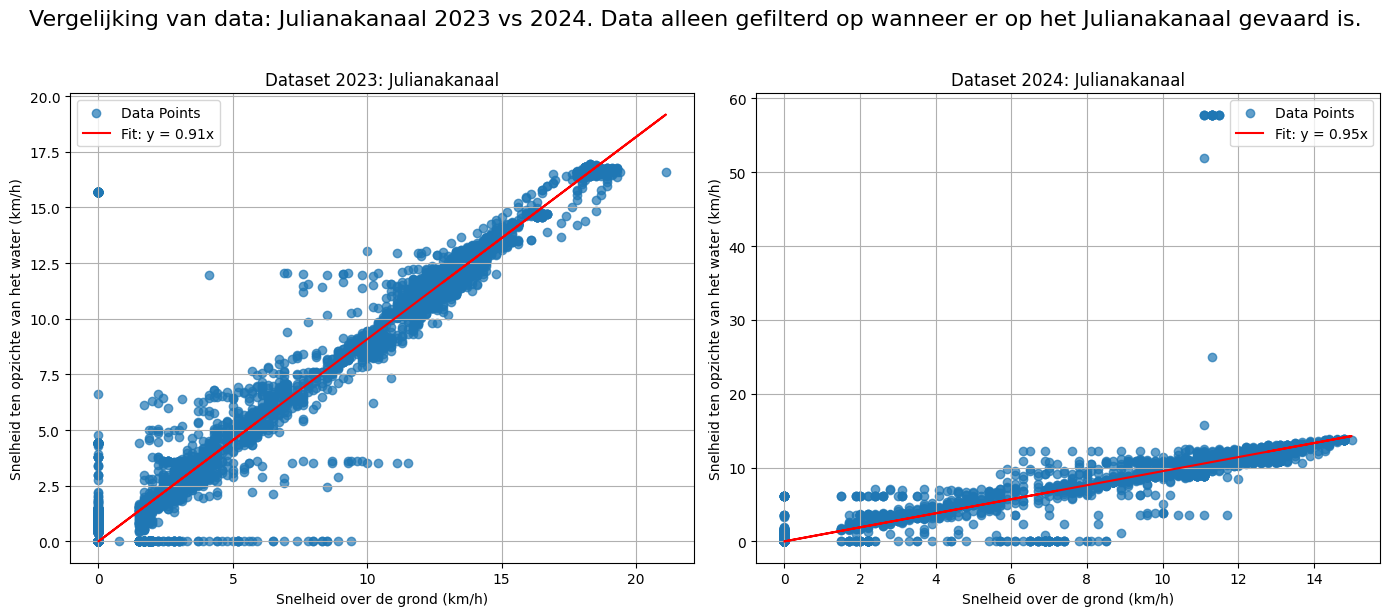

In [10]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Helper functions
def linear_model_through_origin(x, m):
    """Linear model through origin."""
    return m * x

def calculate_linear_fit(x, y):
    """Calculate linear fit through the origin."""
    popt, _ = curve_fit(linear_model_through_origin, x, y)
    return popt[0]  # Slope (m)

def plot_speeds(ax, x, y, title):
    """Plot speed over ground vs. speed relative to water."""
    if len(x) > 1:
        slope = calculate_linear_fit(x, y)
        y_fit = linear_model_through_origin(x, slope)
        ax.scatter(x, y, label='Data Points', alpha=0.7)
        ax.plot(x, y_fit, color='red', label=f'Fit: y = {slope:.2f}x')
        ax.set_title(title)
        ax.set_xlabel('Snelheid over de grond (km/h)')
        ax.set_ylabel('Snelheid ten opzichte van het water (km/h)')
        ax.legend()
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, 'Not enough data', ha='center', va='center', fontsize=12)

# Extract data for plotting
x_2023 = merged_df_2023_clean['1_Snelheid over de grond in km/h']
y_2023 = merged_df_2023_clean['1_Snelheid tenopzichte van het water in Kilometers per uur']

x_2024 = merged_df_2024_clean['1_Snelheid over de grond in km/h']
y_2024 = merged_df_2024_clean['1_Snelheid tenopzichte van het water in Kilometers per uur']

# Create subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot data for Julianakanaal 2023
plot_speeds(axes[0], x_2023, y_2023, 'Dataset 2023: Julianakanaal')

# Plot data for Julianakanaal 2024
plot_speeds(axes[1], x_2024, y_2024, 'Dataset 2024: Julianakanaal')

# Add a general title above the subplots
plt.suptitle('Vergelijking van data: Julianakanaal 2023 vs 2024. Data alleen gefilterd op wanneer er op het Julianakanaal gevaard is.', fontsize=16, y=1.02)

# Adjust layout to make room for the general title
plt.tight_layout()
plt.show()


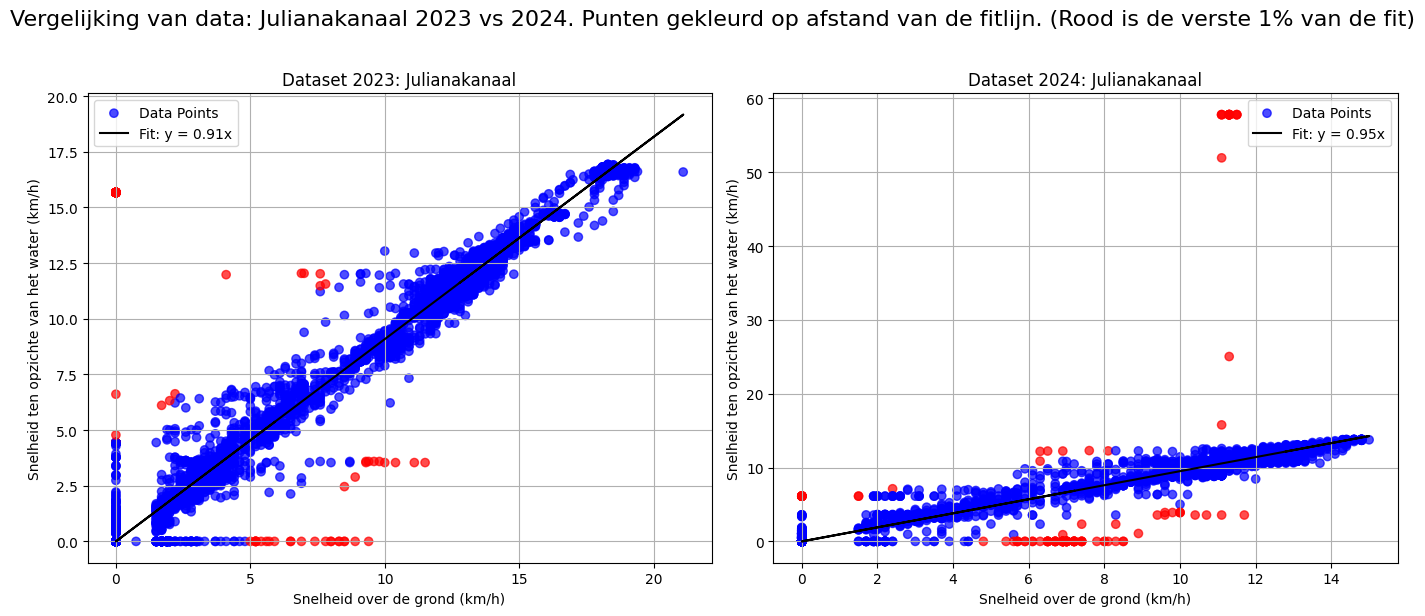

In [19]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# Helper functions
def linear_model_through_origin(x, m):
    """Linear model through origin."""
    return m * x

def calculate_linear_fit(x, y):
    """Calculate linear fit through the origin."""
    popt, _ = curve_fit(linear_model_through_origin, x, y)
    return popt[0]  # Slope (m)

def plot_speeds_with_distance_color(ax, x, y, title):
    """Plot speed over ground vs. speed relative to water, coloring points by distance to fit."""
    if len(x) > 1:
        # Calculate the fit
        slope = calculate_linear_fit(x, y)
        y_fit = linear_model_through_origin(x, slope)

        # Calculate residuals (distance from fit line)
        residuals = np.abs(y - y_fit)
        threshold = np.percentile(residuals, 99)  # Define threshold as 75th percentile of residuals

        # Assign colors based on residuals
        colors = np.where(residuals <= threshold, 'blue', 'red')

        # Plot data points with colors
        scatter = ax.scatter(x, y, c=colors, alpha=0.7, label='Data Points')

        # Plot the fit line
        ax.plot(x, y_fit, color='black', label=f'Fit: y = {slope:.2f}x')
        ax.set_title(title)
        ax.set_xlabel('Snelheid over de grond (km/h)')
        ax.set_ylabel('Snelheid ten opzichte van het water (km/h)')
        ax.legend()
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, 'Not enough data', ha='center', va='center', fontsize=12)

# Extract data for plotting
x_2023 = merged_df_2023_clean['1_Snelheid over de grond in km/h']
y_2023 = merged_df_2023_clean['1_Snelheid tenopzichte van het water in Kilometers per uur']

x_2024 = merged_df_2024_clean['1_Snelheid over de grond in km/h']
y_2024 = merged_df_2024_clean['1_Snelheid tenopzichte van het water in Kilometers per uur']

# Create subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot data for Julianakanaal 2023 with distance-based coloring
plot_speeds_with_distance_color(axes[0], x_2023, y_2023, 'Dataset 2023: Julianakanaal')

# Plot data for Julianakanaal 2024 with distance-based coloring
plot_speeds_with_distance_color(axes[1], x_2024, y_2024, 'Dataset 2024: Julianakanaal')

# Add a general title above the subplots
plt.suptitle('Vergelijking van data: Julianakanaal 2023 vs 2024. Punten gekleurd op afstand van de fitlijn. (Rood is de verste 1% van de fit)', fontsize=16, y=1.02)

# Adjust layout to make room for the general title
plt.tight_layout()
plt.show()


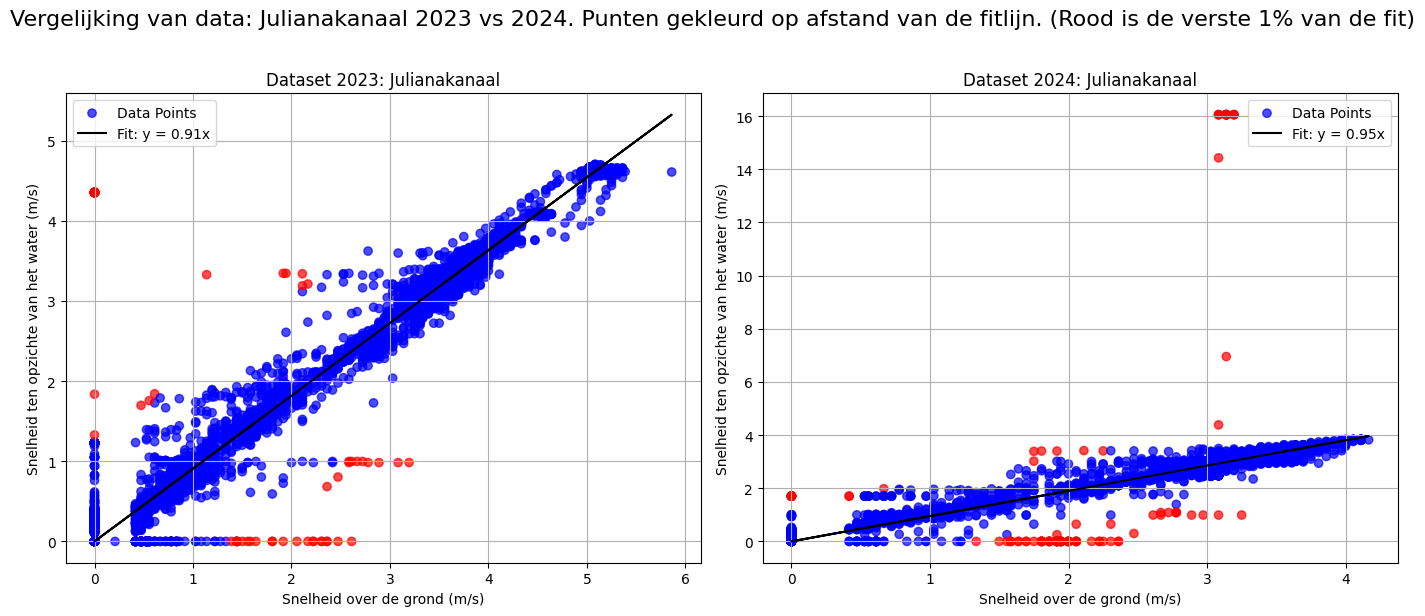

In [22]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# Helper functions
def linear_model_through_origin(x, m):
    """Linear model through origin."""
    return m * x

def calculate_linear_fit(x, y):
    """Calculate linear fit through the origin."""
    popt, _ = curve_fit(linear_model_through_origin, x, y)
    return popt[0]  # Slope (m)

def plot_speeds_with_distance_color(ax, x, y, title):
    """Plot speed over ground vs. speed relative to water, coloring points by distance to fit."""
    if len(x) > 1:
        # Calculate the fit
        slope = calculate_linear_fit(x, y)
        y_fit = linear_model_through_origin(x, slope)

        # Calculate residuals (distance from fit line)
        residuals = np.abs(y - y_fit)
        threshold = np.percentile(residuals, 99)  # Define threshold as 99th percentile of residuals

        # Assign colors based on residuals
        colors = np.where(residuals <= threshold, 'blue', 'red')

        # Plot data points with colors
        scatter = ax.scatter(x, y, c=colors, alpha=0.7, label='Data Points')

        # Plot the fit line
        ax.plot(x, y_fit, color='black', label=f'Fit: y = {slope:.2f}x')
        ax.set_title(title)
        ax.set_xlabel('Snelheid over de grond (m/s)')
        ax.set_ylabel('Snelheid ten opzichte van het water (m/s)')
        ax.legend()
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, 'Not enough data', ha='center', va='center', fontsize=12)

# Convert speed to m/s
merged_df_2023_clean['1_Speed_over_ground_m/s'] = merged_df_2023_clean['1_Snelheid over de grond in km/h'] / 3.6
merged_df_2023_clean['1_Speed_relative_to_water_m/s'] = merged_df_2023_clean['1_Snelheid tenopzichte van het water in Kilometers per uur'] / 3.6

merged_df_2024_clean['1_Speed_over_ground_m/s'] = merged_df_2024_clean['1_Snelheid over de grond in km/h'] / 3.6
merged_df_2024_clean['1_Speed_relative_to_water_m/s'] = merged_df_2024_clean['1_Snelheid tenopzichte van het water in Kilometers per uur'] / 3.6

# Extract data for plotting
x_2023 = merged_df_2023_clean['1_Speed_over_ground_m/s']
y_2023 = merged_df_2023_clean['1_Speed_relative_to_water_m/s']

x_2024 = merged_df_2024_clean['1_Speed_over_ground_m/s']
y_2024 = merged_df_2024_clean['1_Speed_relative_to_water_m/s']

# Create subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot data for Julianakanaal 2023 with distance-based coloring
plot_speeds_with_distance_color(axes[0], x_2023, y_2023, 'Dataset 2023: Julianakanaal')

# Plot data for Julianakanaal 2024 with distance-based coloring
plot_speeds_with_distance_color(axes[1], x_2024, y_2024, 'Dataset 2024: Julianakanaal')

# Add a general title above the subplots
plt.suptitle('Vergelijking van data: Julianakanaal 2023 vs 2024. Punten gekleurd op afstand van de fitlijn. (Rood is de verste 1% van de fit)', fontsize=16, y=1.02)

# Adjust layout to make room for the general title
plt.tight_layout()
plt.show()


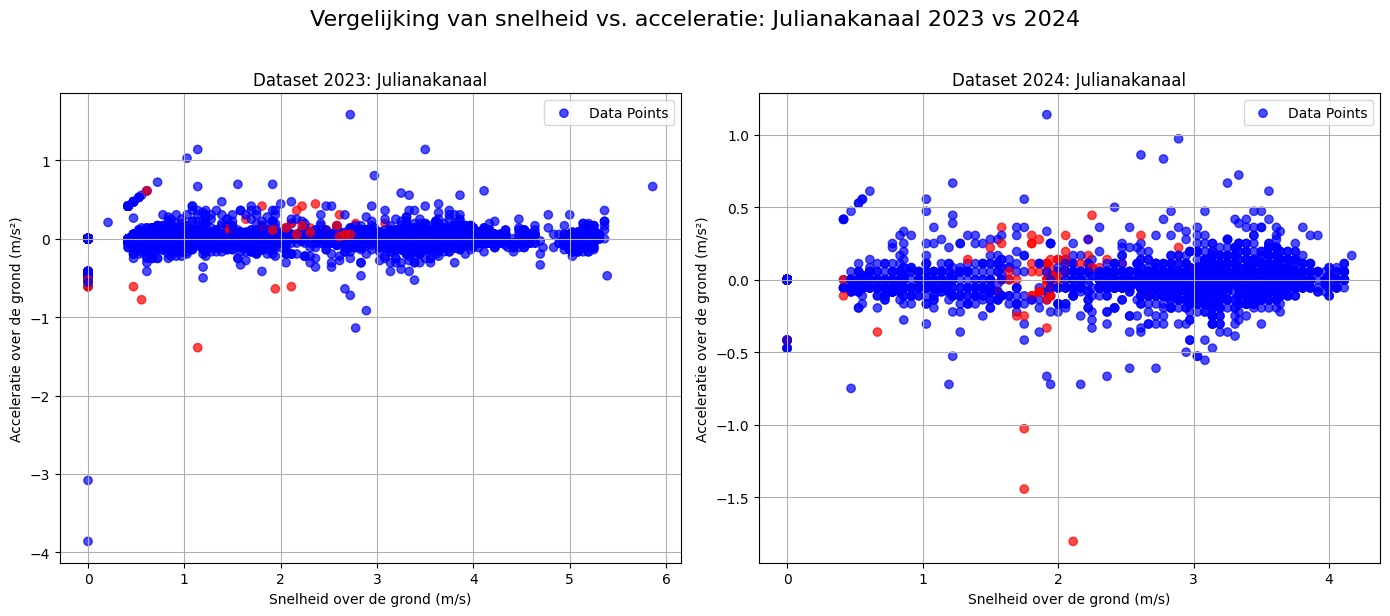

In [23]:
# Calculate acceleration over ground for both datasets
merged_df_2023_clean['1_Acceleration_over_ground_m/s^2'] = merged_df_2023_clean['1_Speed_over_ground_m/s'].diff()
merged_df_2024_clean['1_Acceleration_over_ground_m/s^2'] = merged_df_2024_clean['1_Speed_over_ground_m/s'].diff()

def plot_speed_vs_acceleration_with_color(ax, x, y, residuals, title):
    """Plot speed vs. acceleration with colors based on distance to fit."""
    threshold = np.percentile(residuals, 99)  # Use 99th percentile for threshold
    colors = np.where(residuals <= threshold, 'blue', 'red')

    # Plot data points
    scatter = ax.scatter(x, y, c=colors, alpha=0.7, label='Data Points')

    ax.set_title(title)
    ax.set_xlabel('Snelheid over de grond (m/s)')
    ax.set_ylabel('Acceleratie over de grond (m/s²)')
    ax.legend()
    ax.grid(True)

# Extract data for acceleration plots
x_acc_2023 = merged_df_2023_clean['1_Speed_over_ground_m/s']
y_acc_2023 = merged_df_2023_clean['1_Acceleration_over_ground_m/s^2']
residuals_2023 = np.abs(merged_df_2023_clean['1_Speed_relative_to_water_m/s'] - linear_model_through_origin(x_2023, calculate_linear_fit(x_2023, y_2023)))

x_acc_2024 = merged_df_2024_clean['1_Speed_over_ground_m/s']
y_acc_2024 = merged_df_2024_clean['1_Acceleration_over_ground_m/s^2']
residuals_2024 = np.abs(merged_df_2024_clean['1_Speed_relative_to_water_m/s'] - linear_model_through_origin(x_2024, calculate_linear_fit(x_2024, y_2024)))

# Create subplots for speed vs acceleration
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot data for Julianakanaal 2023
plot_speed_vs_acceleration_with_color(axes[0], x_acc_2023, y_acc_2023, residuals_2023, 'Dataset 2023: Julianakanaal')

# Plot data for Julianakanaal 2024
plot_speed_vs_acceleration_with_color(axes[1], x_acc_2024, y_acc_2024, residuals_2024, 'Dataset 2024: Julianakanaal')

# Add a general title above the subplots
plt.suptitle('Vergelijking van snelheid vs. acceleratie: Julianakanaal 2023 vs 2024', fontsize=16, y=1.02)

# Adjust layout to make room for the general title
plt.tight_layout()
plt.show()


# Plotting the speed over ground vs the acceleration over ground for the Julianakanaal 2023 and 2024 datasets

C:\Users\quinc\AppData\Local\Temp\ipykernel_51208\1139640391.py:4: RuntimeWarning: divide by zero encountered in divide
  return np.diff(y) / np.diff(x)
C:\Users\quinc\AppData\Local\Temp\ipykernel_51208\1139640391.py:4: RuntimeWarning: invalid value encountered in divide
  return np.diff(y) / np.diff(x)


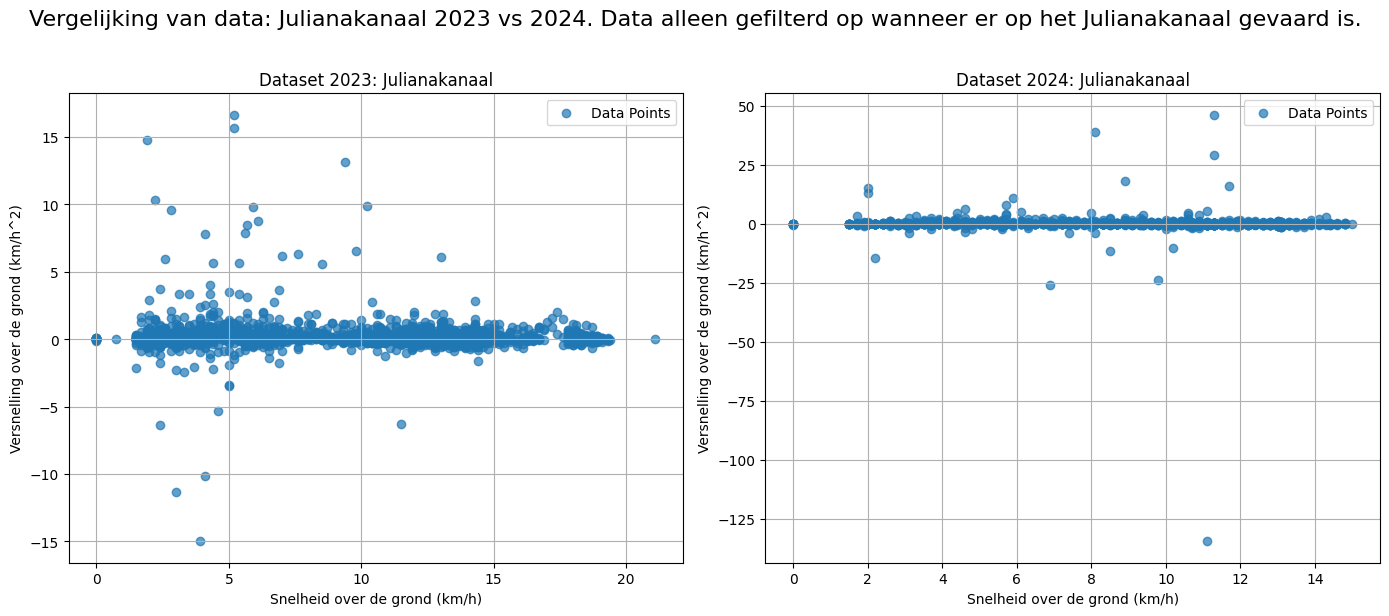

In [11]:
# Helper functions
def calculate_acceleration(x, y):
    """Calculate acceleration based on speed over ground."""
    return np.diff(y) / np.diff(x)

def plot_acceleration(ax, x, y, title):
    """Plot acceleration over ground vs. speed over ground."""
    if len(x) > 1:
        acceleration = calculate_acceleration(x, y)
        ax.scatter(x[:-1], acceleration, label='Data Points', alpha=0.7)
        ax.set_title(title)
        ax.set_xlabel('Snelheid over de grond (km/h)')
        ax.set_ylabel('Versnelling over de grond (km/h^2)')
        ax.legend()
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, 'Not enough data', ha='center', va='center', fontsize=12)
        
# Create subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot data for Julianakanaal 2023
plot_acceleration(axes[0], x_2023, y_2023, 'Dataset 2023: Julianakanaal')

# Plot data for Julianakanaal 2024
plot_acceleration(axes[1], x_2024, y_2024, 'Dataset 2024: Julianakanaal')

# Add a general title above the subplots
plt.suptitle('Vergelijking van data: Julianakanaal 2023 vs 2024. Data alleen gefilterd op wanneer er op het Julianakanaal gevaard is.', fontsize=16, y=1.02)

# Adjust layout to make room for the general title
plt.tight_layout()
plt.show()
